### 4.3.1 Networks

- Network refers to the real world object, such as a road network, whereas a graph refers to its abstract mathematical representation.
- Graphs consist of nodes, also called vertices, and links, also called edges. Mathematically, a graph is a collection of vertices and edges where each edge corresponds to a pair of vertices. A path is a sequence of unique vertices
- A graph is said to be connected if every vertex is reachable from every other vertex, that is, if there is a path from every vertex to every other vertex.
- If a graph is disconnected, it breaks apart naturally into pieces, or components. Any component is connected when considered on its own, but there are no edges between the nodes that belong to different components.
- The structure of a network can be stored in what is know as an adjacency matrix. If we have n nodes, this is n by n matrix, where entry ij is one if node i and node j have a tie between them. Otherwise, that entry is equal to zero.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
# init graph
G = nx.Graph()

# add nodes
G.add_nodes_from([1,2,3,4,"u","v"])

# set edges
G.add_edges_from([(1,3), (1,4), (1,5)])

Average degree: 4.59


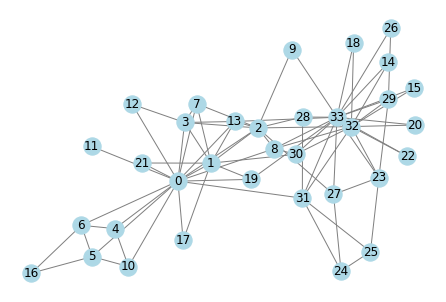

In [3]:
# example graph
G = nx.karate_club_graph()

# plot the graph
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="grey")

degree_sequence = [d for n, d in G.degree()]
print("Average degree: %.2f" % np.mean(degree_sequence))

- the degree of a node in a network is the number of connections it has to other nodes and the degree distribution is the probability distribution of these degrees over the whole network. 

- Networkx stores the degrees of nodes in a dictionary where the keys are node IDs and the values are their associated degrees.

##### ER graph model:
- This family of random graphs has two parameters, capital N and lowercase p. Here the capital N is the number of nodes in the graph, and p is the probability for any pair of nodes to be connected by an edge.
- ... In other words, you're considering each pair of nodes once, independently of any other pair.
- 

In [4]:
def er_graph(N, p):
    """ Generates an ER graph. """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p) == True:
                G.add_edge(node1, node2)
                
    return G

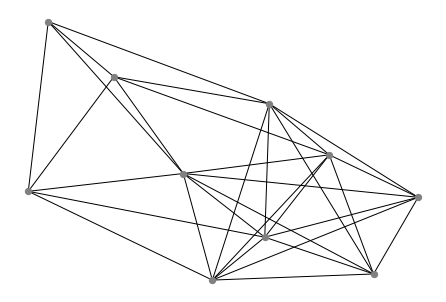

In [5]:
nx.draw(er_graph(10, 0.8), node_size=40, node_color="grey")

In [6]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree of distribution")

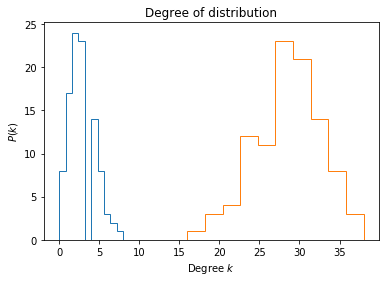

In [7]:
G1 = er_graph(100, 0.03)
plot_degree_distribution(G1)
G2 = er_graph(100, 0.3)
plot_degree_distribution(G2)
plt.show()

#### Indian village example

In [8]:
# Reading adjacency matrices form files.
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

In [9]:
# creating graph-objects from adjacency matrices.
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [10]:
# extract G.degree dict.
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [11]:
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


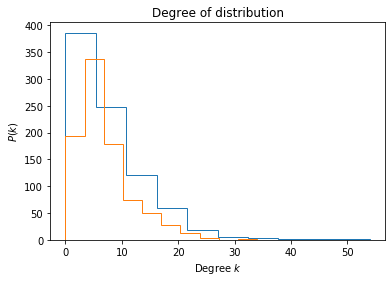

In [12]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

Notice how the degree distributions look quite different from what
we observed for the ER networks.
It seems that most people have relatively few connections,
whereas a small fraction of people have a large number of connections.
This distribution doesn't look at all symmetric,
and its tail extends quite far to the right.
This suggests that the ER graphs are likely not good models
for real world social networks.
In practice, we can use ER graphs as a kind of reference graph
by comparing their properties to those of empirical social networks.
More sophisticated network models are able to capture
many of the properties that are shown by real world networks.


Generator functions do not return a single object but instead, they can be used to generate a sequence of objects using the next method.

In [13]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
gen = connected_component_subgraphs(G1)

In [21]:
# Get larges conected components
G1_LCC = max(connected_component_subgraphs(G1), key=len)
G2_LCC = max(connected_component_subgraphs(G2), key=len)

In [23]:
# Get relation of LCC to n-nodes.
G1_LCC.number_of_nodes() / G1.number_of_nodes()
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

A community is a group of nodes that are densely connected to other nodes in the group, but only sparsely connected nodes outside of that group.